In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv('sales_data.csv')

In [3]:
df['Purchase Address'] = df['Purchase Address'].str.strip()  # remove espaços
df['Purchase Address'] = df['Purchase Address'].str.upper()  # uniformiza maiúsculas

In [4]:
clientes_dict = {}
for cid, endereco in enumerate(df['Purchase Address'].unique(), start=1):
    produtos_cliente = df.loc[df['Purchase Address'] == endereco, 'Product'].unique().tolist()
    clientes_dict[cid] = produtos_cliente
    print(f'Cliente {cid} gerado')


A saída de streaming foi truncada nas últimas 5000 linhas.
Cliente 123082 gerado
Cliente 123083 gerado
Cliente 123084 gerado
Cliente 123085 gerado
Cliente 123086 gerado
Cliente 123087 gerado
Cliente 123088 gerado
Cliente 123089 gerado
Cliente 123090 gerado
Cliente 123091 gerado
Cliente 123092 gerado
Cliente 123093 gerado
Cliente 123094 gerado
Cliente 123095 gerado
Cliente 123096 gerado
Cliente 123097 gerado
Cliente 123098 gerado
Cliente 123099 gerado
Cliente 123100 gerado
Cliente 123101 gerado
Cliente 123102 gerado
Cliente 123103 gerado
Cliente 123104 gerado
Cliente 123105 gerado
Cliente 123106 gerado
Cliente 123107 gerado
Cliente 123108 gerado
Cliente 123109 gerado
Cliente 123110 gerado
Cliente 123111 gerado
Cliente 123112 gerado
Cliente 123113 gerado
Cliente 123114 gerado
Cliente 123115 gerado
Cliente 123116 gerado
Cliente 123117 gerado
Cliente 123118 gerado
Cliente 123119 gerado
Cliente 123120 gerado
Cliente 123121 gerado
Cliente 123122 gerado
Cliente 123123 gerado
Cliente 123124 ge

In [5]:
mlb = MultiLabelBinarizer()
matriz = pd.DataFrame(
    mlb.fit_transform(list(clientes_dict.values())),
    index=clientes_dict.keys(),
    columns=mlb.classes_
)

print("\nMatriz binária (primeiras 5 linhas):")
print(matriz.head())


Matriz binária (primeiras 5 linhas):
   20in Monitor  27in 4K Gaming Monitor  27in FHD Monitor  \
1             0                       0                 0   
2             0                       0                 0   
3             0                       0                 0   
4             0                       0                 1   
5             0                       0                 0   

   34in Ultrawide Monitor  AA Batteries (4-pack)  AAA Batteries (4-pack)  \
1                       0                      0                       0   
2                       0                      0                       0   
3                       0                      1                       0   
4                       0                      0                       0   
5                       0                      0                       0   

   Apple Airpods Headphones  Bose SoundSport Headphones  Flatscreen TV  \
1                         0                           0         

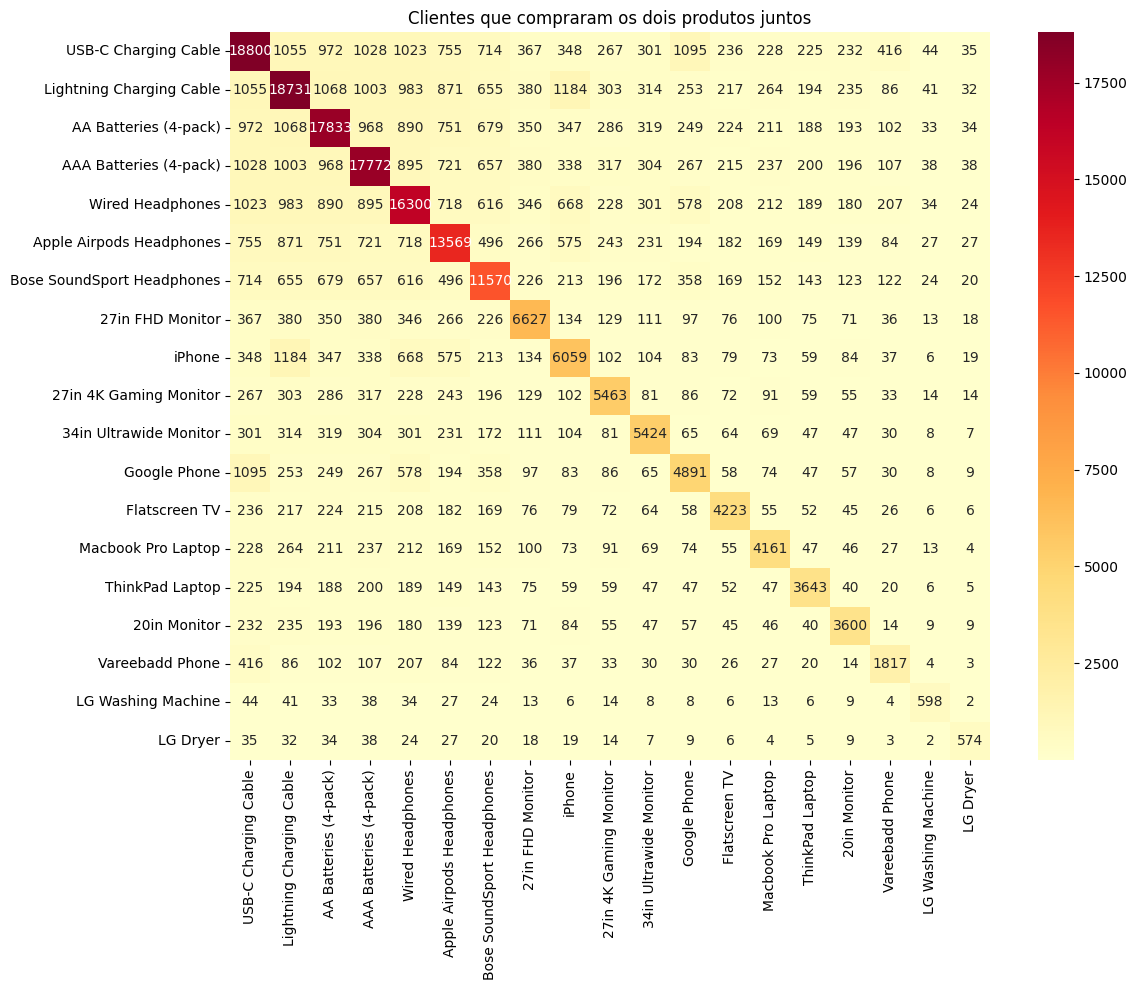

In [6]:
coocorrencia = matriz.T.dot(matriz)

# 5️⃣ Normalização opcional (valores entre 0 e 1)
relacao = coocorrencia / coocorrencia.to_numpy().max()

# 6️⃣ Visualização com heatmap
# Selecionar top N produtos mais comprados para visualização
top_produtos = matriz.sum().sort_values(ascending=False).head(20).index

plt.figure(figsize=(12,10))
sns.heatmap(
    coocorrencia.loc[top_produtos, top_produtos],
    annot=True, fmt="d", cmap="YlOrRd"
)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title("Clientes que compraram os dois produtos juntos")
plt.tight_layout()
plt.show()

In [11]:
produto = "20in Monitor"

linha = coocorrencia.loc[produto].drop(produto)
top3 = linha.nlargest(3)

print(produto)
print(top3)

20in Monitor
Lightning Charging Cable    235
USB-C Charging Cable        232
AAA Batteries (4-pack)      196
Name: 20in Monitor, dtype: int64


In [9]:
import pickle

with open("clientes_dict.pkl", "wb") as f:
    pickle.dump(clientes_dict, f)

print("Dicionário salvo com sucesso!")


Dicionário salvo com sucesso!


In [10]:
clientes_dict

{1: ['iPhone', 'USB-C Charging Cable'],
 2: ['Lightning Charging Cable'],
 3: ['Wired Headphones', 'AA Batteries (4-pack)'],
 4: ['27in FHD Monitor'],
 5: ['Wired Headphones'],
 6: ['AAA Batteries (4-pack)'],
 7: ['27in 4K Gaming Monitor', 'AA Batteries (4-pack)'],
 8: ['USB-C Charging Cable'],
 9: ['Bose SoundSport Headphones',
  'USB-C Charging Cable',
  'Lightning Charging Cable'],
 10: ['Apple Airpods Headphones', '20in Monitor'],
 11: ['Apple Airpods Headphones'],
 12: ['Macbook Pro Laptop',
  'Lightning Charging Cable',
  'Apple Airpods Headphones'],
 13: ['AAA Batteries (4-pack)'],
 14: ['27in FHD Monitor', 'Apple Airpods Headphones'],
 15: ['Flatscreen TV'],
 16: ['27in FHD Monitor'],
 17: ['Vareebadd Phone'],
 18: ['Apple Airpods Headphones'],
 19: ['USB-C Charging Cable'],
 20: ['AA Batteries (4-pack)'],
 21: ['AAA Batteries (4-pack)'],
 22: ['USB-C Charging Cable', 'Wired Headphones'],
 23: ['Google Phone'],
 24: ['Apple Airpods Headphones'],
 25: ['AA Batteries (4-pack)'],


In [16]:
len(df['Purchase Address'].unique())

140787

In [24]:

#Localiza todos as linhas com valores correspondentes
df.loc[df['Purchase Address'] == '14 Madison St, San Francisco, CA 94016']

,Order Date,Order ID,Product,Product_ean,catégorie,Purchase Address,Quantity Ordered,Price Each,Cost price,turnover,margin
185945,2019-12-11 20:58:00,319666,Lightning Charging Cable,6.545974e+12,Électronique,"14 Madison St, San Francisco, CA 94016",1,14.95,7.475,14.95,7.475
